In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fn = 'elevutm2.txt'

In [5]:
# Reads the first 6 lines of an ArcAscii file given by the string "filename" 
#and returns a dictionary of the values
# Use the given names as keys for the dictionary.  Values should be numbers 
#(floats or integers as appropriate).
# Nodata should be considered a float
# Write a print statement to demonstrate the correct read of the header data

def read_header(filename):
    with open(filename, 'r') as f:
        firstsix = f.readlines()[0:6]
        #return firstsix
        
    d = {}
    for item in firstsix:
        a = item.split()
        d[str(a[0])] = float(a[1])
    d['ncols'] = int(d['ncols'])
    d['nrows'] = int(d['nrows'])
    
    return(d)
   
   #figure out how to convert binary to string
    #example bin2str instead of str (but bin2str doesnt work)

In [6]:
print(read_header(fn))

{'ncols': 1532, 'nrows': 1858, 'xllcorner': 545188.67725766, 'yllcorner': 4097120.2808038, 'cellsize': 27.776299740871, 'NODATA_value': -9999.0}


In [7]:
header = read_header(fn)
print(header)

{'ncols': 1532, 'nrows': 1858, 'xllcorner': 545188.67725766, 'yllcorner': 4097120.2808038, 'cellsize': 27.776299740871, 'NODATA_value': -9999.0}


- Write a function (read_data) that takes a string as the filename and then reads the 7th line to end of file (EOF) as data.
- The function should read the data into a 1D numpy array using the numpy.loadtxt function.
- From inside the function (i.e., do not rely on global variables) call the header to retreive the dictionary.
- Reshape (np.reshape) the data to the correct number of rows and cols as specified in the header.
- Any values equal to the NODATA_value should be replaced with np.nan.
- Return the data.
- Write a codeblock that prints the shape of the array, and a statement/s that reads the data, 
and then calculates and displays the mean and standard deviation elevation values.

In [8]:

def read_data(filename):
    d = read_header(filename)
    
    data = np.loadtxt(filename, skiprows=6)
    nrows = d['nrows']
    ncols = d['ncols']
    
    reshaped_data = np.reshape(data, (nrows,ncols))
    
    nodata = d['NODATA_value']
    reshaped_data[reshaped_data == nodata] = np.nan
    
    return reshaped_data

In [9]:
x = read_data(fn)

print(x) # shape
print()
#mean
print('The mean elevation is', np.nanmean(x), 'meters')

#std dev
print('The standard deviation of the elevation data is', np.nanstd(x), 'meters')

[[1145.396  1144.06   1147.488  ...  481.5375  479.3726  474.6361]
 [1138.893  1138.396  1141.832  ...  479.9771  476.9141  472.2178]
 [1132.215  1131.622  1135.237  ...  476.9515  475.1002  469.2859]
 ...
 [ 685.069   678.1508  667.2446 ...  400.9193  396.7241  393.5406]
 [ 687.9758  677.8782  664.0839 ...  399.7766  391.3958  388.2765]
 [ 688.3303  676.5457  661.9195 ...  399.2368  394.1736  390.1692]]

The mean elevation is 636.528966461066 meters
The standard deviation of the elevation data is 156.4098944682388 meters


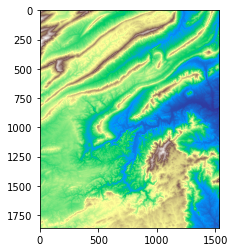

In [10]:
# Using matplotlib, display the DEM using plt.imshow. Diplay using the "terrain" colormap.
plt.imshow(x, cmap = 'terrain')

Using matplotlib, display a histogram of elevation values (plt.hist). 
Define the number of bins to something other than 10 that looks good. Label the axis (plt.xlabel). 
BE CAREFUL WHEN CALLING HIST. Instead of calling with plt.hist(x), call using plt.hist(x.ravel()). 
Why is this important? What does .ravel() do? Explain in a markdown box underneath the plot.

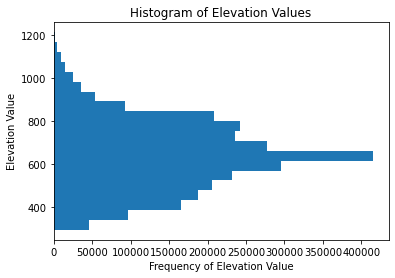

In [11]:
plt.hist(x.ravel(), bins =20, orientation = 'horizontal')
plt.xlabel('Frequency of Elevation Value')
plt.ylabel('Elevation Value')
plt.title('Histogram of Elevation Values')
plt.show()

It's important to call the .ravel method because it will wind up or 'ravel' your data into a 1D array for processing for the histogram. If the data were to remain in the 2D array as we worked with it in previous codeblocks, it would be difficult to create the histogram, as we wouldn't necessarily have a data set resembling a set of raw counts, which is what the 1D array is similar to. 

# Graduate Students

In [ ]:
gx,gy = np.gradient()